In [ ]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
# Gerar imagem em melhot qualidade e em ingles
import pickle

with open('model_RF_permutation.pkl', 'rb') as f:
    classifier = pickle.load(f)

with open('X_trainRF.pickle', 'rb') as f:
    X_train = pickle.load(f)


with open('y_trainRF.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('X_testRF.pickle', 'rb') as f:
    X_test = pickle.load(f)


with open('y_testRF.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carrega os dados do arquivo Excel
dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')

#Perason comeca aqui - Correlacao de 0.6
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Composto', axis=1)
dataset = dataset.drop('Átomos', axis=1)


dataframe_pandas_features= dataset

print(dataset.columns)
corr_matrix = dataset.corr(method ='pearson', numeric_only=True).abs()

# Selecionar o triângulo superior da matriz de correlação
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar os índices das colunas com correlação maior que 0.6
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

# Remover apenas a primeira coluna de cada par altamente correlacionado
dataset = dataset.drop(to_drop, axis=1)



print(len(dataset.columns))
print(dataset.columns)
#sns.heatmap(correlation,cbar = True,linewidths= 0.5)
#plt.savefig('heatmap.png', dpi=1200, bbox_inches='tight')

Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_ea_media', 'atomic_ea_desvio', 'atomic_en_allen _soma',
       'atomic_en_allen _media', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_en_allredroch_soma',
       ...
       'entropia-oxidos_minimo', 'entropia-oxidos_maximo',
       'entropia-oxidos_soma', 'entropia-oxidos_media',
       'entropia-oxidos_desvio', 'deltaCp-oxidos_minimo',
       'deltaCp-oxidos_maximo', 'deltaCp-oxidos_soma', 'deltaCp-oxidos_media',
       'deltaCp-oxidos_desvio'],
      dtype='object', length=204)
12
Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_en_allen _soma', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_hatm_minimo',
       'atomic_spacegroupnum_maximo', 'atomic_spacegroupnum_desvio',
       'mineral_hardness_maximo', 'van_der_waals_rad_minimo',
       'vel_of_sound_minimo'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd

colunas_para_manter = [
    "atomic_radius_calculated_minimo",
    "atomic_spacegroupnum_maximo",
    "atomic_hatm_media",
    "bulk_mod_maximo",
    "atomic_ea_soma",
    "electronegativity_ghosh_desvio",
    "atomic_ea_desvio",
    "density_of_solid_desvio",
    "atomic_ea_minimo",
    "atomic_ea_media"
]


def reduzir_dimensao (reduzendo, todas_as_features, colunas_para_manter) :

  arr = reduzendo

  # obter todos os rótulos das colunas do dataframe
  rotulos_das_colunas = todas_as_features.columns.tolist()

  # criar uma lista com as posições das colunas a serem deletadas
  colunas_para_deletar = [i for i in range(len(rotulos_das_colunas)) if rotulos_das_colunas[i] not in colunas_para_manter]


  # deletar as colunas do array numpy
  arr = np.delete(arr, colunas_para_deletar, axis=1)

  return arr

#reduzir features conjunto X

X_train = reduzir_dimensao(X_train,dataframe_pandas_features,colunas_para_manter).copy()
X_test = reduzir_dimensao(X_test,dataframe_pandas_features,colunas_para_manter).copy()

In [ ]:

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8620689655172413


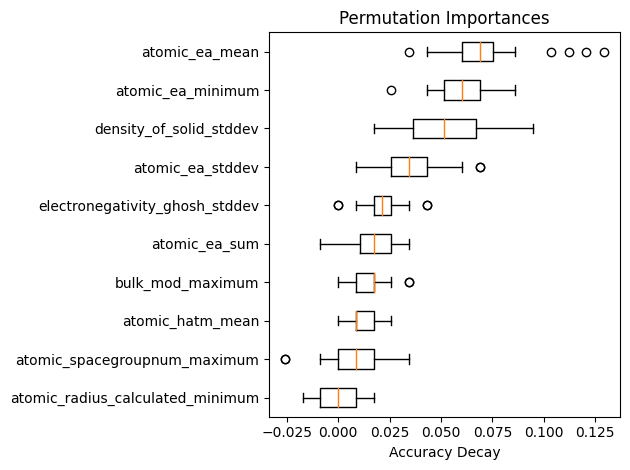

In [ ]:

from sklearn.inspection import permutation_importance

r2 = permutation_importance(classifier, X_train, y_train,
                          n_repeats=30,
                           random_state=0)

# Sort the features by importance
sorted_idx = r2.importances_mean.argsort()
colunas_para_manter = [colunas_para_manter[i] for i in sorted_idx]

features_list = [
    "atomic_radius_calculated_minimum",
    "atomic_spacegroupnum_maximum",
    "atomic_hatm_mean",
    "bulk_mod_maximum",
    "atomic_ea_sum",
    "electronegativity_ghosh_stddev",
    "atomic_ea_stddev",
    "density_of_solid_stddev",
    "atomic_ea_minimum",
    "atomic_ea_mean"
]


fig, ax = plt.subplots()
ax.boxplot(r2.importances[sorted_idx].T,
           vert=False, labels=features_list)

ax.set_title("Permutation Importances")
ax.set_xlabel("Accuracy Decay")  # Set the X-axis label to "Accuracy Decay"
fig.tight_layout()
fig.savefig('feature_importances_RF.png')  # Save the figure
plt.show()